In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

https://www.google.com/search?client=safari&rls=en&q=yeo+johnson+transformation&ie=UTF-8&oe=UTF-8

## Loading the dataset ...

In [2]:
df = pd.read_excel('ML_Acc_Dec_Datasetsample.xlsx')
df.head()

,SNo,SubjID,SubjType,Time,StrictLeaderType,SideLeader Right,SideLeader Left,Acc,V,Gap,DeltaV,Category,Regimes,AccGapWiden
0,5,7,1,15,1,0,0,0.753801,12.549357,11.503159,0.091850,1,2.0,1
1,7,10,1,16,1,0,0,2.656502,11.684158,6.134527,4.807924,1,4.0,1
2,9,11,1,13,1,0,0,1.668593,12.310612,8.152329,0.389053,1,5.0,1
3,12,13,1,17,1,0,0,1.257824,12.986008,12.443832,2.004326,1,2.0,1
4,13,14,1,12,1,0,0,1.829174,11.325309,3.792806,4.808758,1,4.0,1


### Dataset Information

- Response variable is **Acceleration**
- Independent variables data definition are as follows
- id : vehicle id
- subjtype - 1 (tw), 2 car
- strict leader type: 1 tw, 2 car, 3+ other
- Sideleader type: 1 tw, 2 car, 3+ other
- log acc is log of **acceleration** 
- log abs speed is log of speed of subj vehicle
- log S is log of spacing between leader and follower
- log deltav is log of speed difference between follower and leader

In [3]:
df.Category.value_counts()

1              2086
Cat1_NoLead    1556
3               783
2               727
Cat2_Right      606
Cat3_Left       578
5               173
Cat5_Both       161
Name: Category, dtype: int64

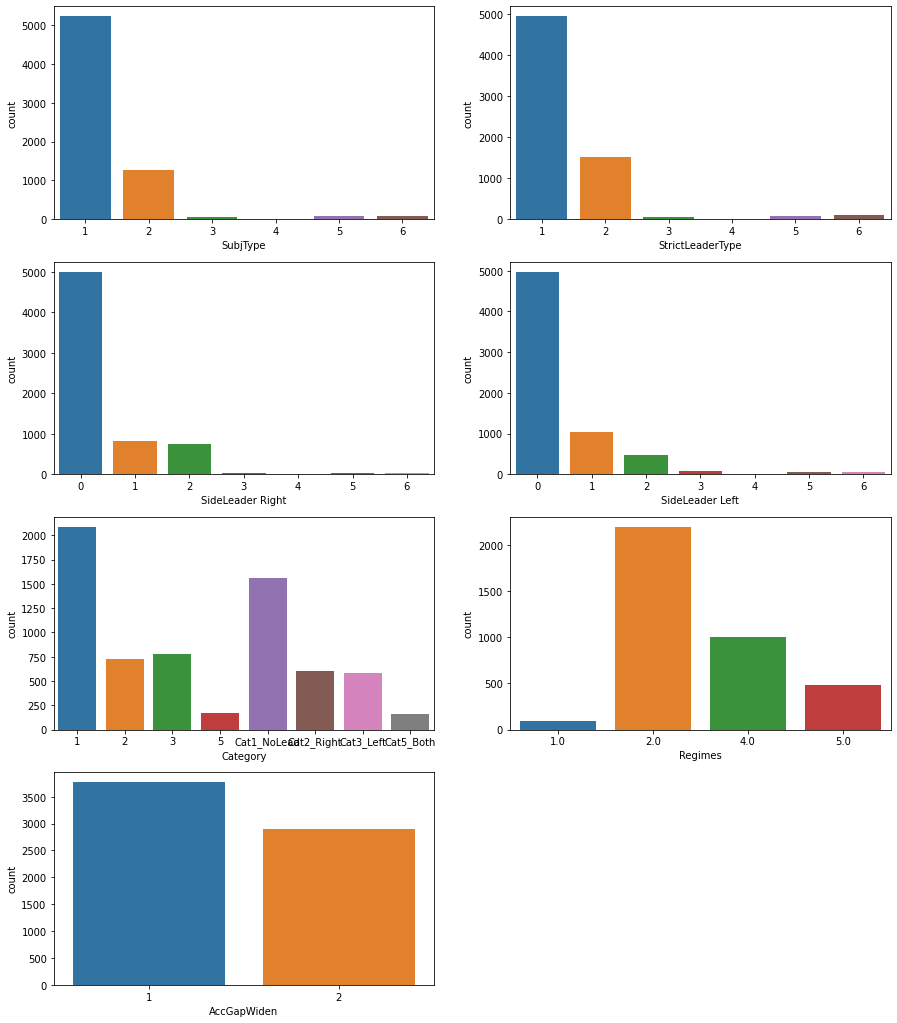

In [4]:
cat_cols = ['SubjType', 'StrictLeaderType','SideLeader Right', 'SideLeader Left',
            'Category', 'Regimes', 'AccGapWiden']

plt.figure(figsize=(15,18))
for i in range(len(cat_cols)):
    plt.subplot(4,2,i+1)
    sns.countplot(df[cat_cols[i]])

<AxesSubplot:xlabel='Category', ylabel='count'>

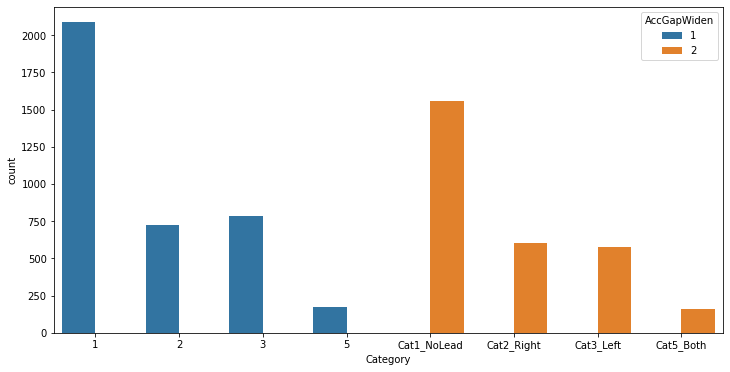

In [5]:
plt.figure(figsize=(12,6))
sns.countplot(x = df['Category'],hue=df['AccGapWiden'])

In [6]:
df1 = df[['SubjType','StrictLeaderType','Category','AccGapWiden','Acc','V','Gap','DeltaV']]
df1.columns = ['Type','SLType','Category','AccGapWiden','Acc','AbsSpd','S','DeltaV']
df1.head()

,Type,SLType,Category,AccGapWiden,Acc,AbsSpd,S,DeltaV
0,1,1,1,1,0.753801,12.549357,11.503159,0.091850
1,1,1,1,1,2.656502,11.684158,6.134527,4.807924
2,1,1,1,1,1.668593,12.310612,8.152329,0.389053
3,1,1,1,1,1.257824,12.986008,12.443832,2.004326
4,1,1,1,1,1.829174,11.325309,3.792806,4.808758


In [7]:
df.Category.value_counts()

1              2086
Cat1_NoLead    1556
3               783
2               727
Cat2_Right      606
Cat3_Left       578
5               173
Cat5_Both       161
Name: Category, dtype: int64

In [8]:
df_wid = df1[df1['AccGapWiden']==1]
df_nar = df1[df1['AccGapWiden']==2]

In [9]:
# col_list = ['AbsSpd','S','DeltaV','Acc']
# fig, axes = plt.subplots(4,2, figsize=(15,15))

# for i in range(len(col_list)):
#     sns.boxplot    (ax=axes[i,1], data = df1, x = col_list[i])
#     sns.scatterplot(ax=axes[i,0], data = df1, x = col_list[i], y = 'Acc')

In [10]:
# col_list = ['AbsSpd','S','DeltaV','Acc']
# fig, axes = plt.subplots(4,2, figsize=(15,15))

# for i in range(len(col_list)):
#     sns.boxplot    (ax=axes[i,1], data = df_nar, x = col_list[i])
#     sns.scatterplot(ax=axes[i,0], data = df_nar, x = col_list[i], y = 'Acc')

In [11]:
# col_list = ['AbsSpd','S','DeltaV','Acc']
# fig, axes = plt.subplots(4,2, figsize=(15,15))

# for i in range(len(col_list)):
#     sns.boxplot    (ax=axes[i,1], data = df_wid, x = col_list[i])
#     sns.scatterplot(ax=axes[i,0], data = df_wid, x = col_list[i], y = 'Acc')

In [12]:
df_wid.shape, df_nar.shape

((3769, 8), (2901, 8))

In [13]:
def vehicle_type(x):
    if x == 1:
        return 'TW'
    elif x == 2:
        return 'Car'
    else:
        return 'Other'
def Catgory(x):
    if x == 1:
        return 'Cat1_NoLead'
    elif x == 2:
        return 'Cat2_Right'
    elif x == 3:
        return 'Cat3_Left'
    elif x == 5:
        return 'Cat5_Both'
    else:
        return x

def cat_name(x):
    x = str(x)
    return str(x[5:])

In [14]:
df_wid['Type'] = df_wid['Type'].apply(vehicle_type)
df_wid['SLType']= df_wid['SLType'].apply(vehicle_type)
df_wid['Category'] = df_wid['Category'].apply(Catgory)

df_nar['Type'] = df_nar['Type'].apply(vehicle_type)
df_nar['SLType']= df_nar['SLType'].apply(vehicle_type)
df_nar['Category'] = df_nar['Category'].apply(Catgory)

In [15]:
df_nar['Category'] = df_nar['Category'].apply(cat_name)
df_wid['Category'] = df_wid['Category'].apply(cat_name)

In [16]:
df_nar.Category.value_counts()

NoLead    1556
Right      606
Left       578
Both       161
Name: Category, dtype: int64

In [17]:
df_nar.head()

,Type,SLType,Category,AccGapWiden,Acc,AbsSpd,S,DeltaV
3769,Other,Car,NoLead,2,-1.765712,14.651772,7.407368,-1.220645
3770,TW,TW,NoLead,2,-1.429217,13.397812,7.783525,-0.416475
3771,TW,TW,NoLead,2,-1.264563,14.294872,18.270116,-0.210936
3772,TW,TW,NoLead,2,-1.975579,12.820746,2.318970,-2.059276
3773,TW,TW,NoLead,2,-0.123943,12.871161,2.094114,-2.025994


In [18]:
df_wid.head()

,Type,SLType,Category,AccGapWiden,Acc,AbsSpd,S,DeltaV
0,TW,TW,NoLead,1,0.753801,12.549357,11.503159,0.091850
1,TW,TW,NoLead,1,2.656502,11.684158,6.134527,4.807924
2,TW,TW,NoLead,1,1.668593,12.310612,8.152329,0.389053
3,TW,TW,NoLead,1,1.257824,12.986008,12.443832,2.004326
4,TW,TW,NoLead,1,1.829174,11.325309,3.792806,4.808758


In [19]:
df_wid = pd.get_dummies(df_wid,prefix=None, prefix_sep='-',sparse=False, drop_first=False)
df_nar = pd.get_dummies(df_nar,prefix=None, prefix_sep='-',sparse=False, drop_first=False)

df_wid.columns

Index(['AccGapWiden', 'Acc', 'AbsSpd', 'S', 'DeltaV', 'Type-Car', 'Type-Other',
       'Type-TW', 'SLType-Car', 'SLType-Other', 'SLType-TW', 'Category-Both',
       'Category-Left', 'Category-NoLead', 'Category-Right'],
      dtype='object')

In [20]:
df_wid.drop(['Type-Other','SLType-Other','Category-Both','AccGapWiden'],axis=1,inplace=True)
df_nar.drop(['Type-Other','SLType-Other','Category-Both','AccGapWiden'],axis=1,inplace=True)

df_wid.head()

,Acc,AbsSpd,S,DeltaV,Type-Car,Type-TW,SLType-Car,SLType-TW,Category-Left,Category-NoLead,Category-Right
0,0.753801,12.549357,11.503159,0.091850,0,1,0,1,0,1,0
1,2.656502,11.684158,6.134527,4.807924,0,1,0,1,0,1,0
2,1.668593,12.310612,8.152329,0.389053,0,1,0,1,0,1,0
3,1.257824,12.986008,12.443832,2.004326,0,1,0,1,0,1,0
4,1.829174,11.325309,3.792806,4.808758,0,1,0,1,0,1,0


In [31]:
df_wid.columns

Index(['Acc', 'AbsSpd', 'S', 'DeltaV', 'Type-Car', 'Type-TW', 'SLType-Car',
       'SLType-TW', 'Category-Left', 'Category-NoLead', 'Category-Right',
       'ColTime'],
      dtype='object')

In [21]:
df_wid[['Type-Car', 'Type-TW', 'SLType-Car','SLType-TW', 'Category-Left', 'Category-NoLead', 
     'Category-Right']] = df_wid[['Type-Car', 'Type-TW', 'SLType-Car','SLType-TW', 'Category-Left', 'Category-NoLead', 
     'Category-Right']].astype('int64')
df_nar[['Type-Car', 'Type-TW', 'SLType-Car','SLType-TW', 'Category-Left', 'Category-NoLead', 
     'Category-Right']] = df_nar[['Type-Car', 'Type-TW', 'SLType-Car','SLType-TW', 'Category-Left', 'Category-NoLead', 
     'Category-Right']].astype('int64')

In [22]:
df_wid.dtypes

Acc                float64
AbsSpd             float64
S                  float64
DeltaV             float64
Type-Car             int64
Type-TW              int64
SLType-Car           int64
SLType-TW            int64
Category-Left        int64
Category-NoLead      int64
Category-Right       int64
dtype: object

In [23]:
df_nar.dtypes

Acc                float64
AbsSpd             float64
S                  float64
DeltaV             float64
Type-Car             int64
Type-TW              int64
SLType-Car           int64
SLType-TW            int64
Category-Left        int64
Category-NoLead      int64
Category-Right       int64
dtype: object

In [24]:
df_wid.describe()

,Acc,AbsSpd,S,DeltaV,Type-Car,Type-TW,SLType-Car,SLType-TW,Category-Left,Category-NoLead,Category-Right
count,3769.000000,3769.000000,3769.000000,3769.000000,3769.000000,3769.000000,3769.000000,3769.000000,3769.000000,3769.000000,3769.000000
mean,1.283074,11.458761,13.499892,1.871377,0.201380,0.763598,0.208013,0.767578,0.207747,0.553462,0.192889
std,1.034201,2.169807,7.346917,1.479204,0.401084,0.424928,0.405940,0.422433,0.405749,0.497200,0.394619
min,0.000448,0.236683,0.019426,0.001932,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.509434,10.057319,7.522245,0.742715,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.030040,11.389106,12.450444,1.520920,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,1.760213,12.895871,18.787494,2.653337,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,4.800000,20.889952,29.995978,9.308112,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Refernce:
- https://www.scikit-yb.org/en/latest/api/regressor/influence.html
- https://songhuiming.github.io/pages/2016/11/27/linear-regression-in-python-outliers-leverage-detect/

## Removing unreasonable combinations of features

In [25]:
# Widening
df_wid['ColTime'] = df_wid['S']/df_wid['DeltaV']

Coll_time_index = df_wid[abs(df_wid['ColTime'])<0.9].index
c1_index = df_wid[(abs(df_wid['DeltaV']) < 0.6) & (abs(df_wid['Acc']) > 2.27)].index
c2_index = df_wid[(abs(df_wid['DeltaV']) > 3.06) & (abs(df_wid['Acc']) < 0.44)].index

set1 = set(Coll_time_index)
set2 = set(c1_index)
set3 = set(c2_index)

set_index = set1.union(set2.union(set3))
final_index = list(set_index)
print(len(final_index))
print(df_wid.shape)
df_wid.drop(final_index, axis=0,inplace=True)
print(df_wid.shape)

230
(3769, 12)
(3539, 12)


In [26]:
df_wid.describe().T

,count,mean,std,min,25%,50%,75%,max
Acc,3539.0,1.269708,0.993019,0.000448,0.540927,1.040206,1.721847,4.800000
AbsSpd,3539.0,11.483900,2.144380,0.236683,10.082648,11.413473,12.909123,20.889952
S,3539.0,13.540865,7.262471,0.317263,7.623155,12.496952,18.781354,29.995978
DeltaV,3539.0,1.811715,1.415334,0.001932,0.755668,1.486004,2.533863,9.308112
Type-Car,3539.0,0.205143,0.403863,0.000000,0.000000,0.000000,0.000000,1.000000
Type-TW,3539.0,0.759537,0.427425,0.000000,1.000000,1.000000,1.000000,1.000000
SLType-Car,3539.0,0.213902,0.410117,0.000000,0.000000,0.000000,0.000000,1.000000
SLType-TW,3539.0,0.761515,0.426218,0.000000,1.000000,1.000000,1.000000,1.000000
Category-Left,3539.0,0.210794,0.407930,0.000000,0.000000,0.000000,0.000000,1.000000
Category-NoLead,3539.0,0.550438,0.497520,0.000000,0.000000,1.000000,1.000000,1.000000


In [27]:
# col_list = ['AbsSpd','S','DeltaV','Acc']
# fig, axes = plt.subplots(4,2, figsize=(15,15))

# for i in range(len(col_list)):
#     sns.boxplot    (ax=axes[i,1], data = df_wid, x = col_list[i])
#     sns.scatterplot(ax=axes[i,0], data = df_wid, x = col_list[i], y = 'Acc')

In [28]:
# Narrowing
df_nar['ColTime'] = df_nar['S']/df_nar['DeltaV']

Coll_time_index = df_nar[abs(df_nar['ColTime'])<0.9].index
c1_index = df_nar[(abs(df_nar['DeltaV']) < 0.6) & (abs(df_nar['Acc']) > 2.27)].index
c2_index = df_nar[(abs(df_nar['DeltaV']) > 3.06) & (abs(df_nar['Acc']) < 0.44)].index

set1 = set(Coll_time_index)
set2 = set(c1_index)
set3 = set(c2_index)

set_index = set1.union(set2.union(set3))
final_index = list(set_index)
print(len(final_index))
print(df_nar.shape)
df_nar.drop(final_index, axis=0,inplace=True)
print(df_nar.shape)

207
(2901, 12)
(2694, 12)


In [29]:
df_nar.describe().T

,count,mean,std,min,25%,50%,75%,max
Acc,2694.0,-1.411495,1.118539,-4.800000,-1.959886,-1.145530,-0.561462,-0.000630
AbsSpd,2694.0,13.542627,2.352668,3.076923,12.033615,13.429759,15.000000,22.725387
S,2694.0,12.730814,7.459172,0.342857,6.741689,11.364936,17.802220,29.993145
DeltaV,2694.0,-1.877991,1.492589,-10.770259,-2.625857,-1.525168,-0.778776,-0.000423
Type-Car,2694.0,0.176689,0.381476,0.000000,0.000000,0.000000,0.000000,1.000000
Type-TW,2694.0,0.804380,0.396751,0.000000,1.000000,1.000000,1.000000,1.000000
SLType-Car,2694.0,0.250928,0.433628,0.000000,0.000000,0.000000,1.000000,1.000000
SLType-TW,2694.0,0.704157,0.456505,0.000000,0.000000,1.000000,1.000000,1.000000
Category-Left,2694.0,0.203044,0.402340,0.000000,0.000000,0.000000,0.000000,1.000000
Category-NoLead,2694.0,0.532665,0.499024,0.000000,0.000000,1.000000,1.000000,1.000000


In [30]:
# df_wid.to_csv("widening.csv")
# df_nar.to_csv("narrowing.csv")